In [177]:
import pandas as pd
import numpy as np
import regex as re
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score

In [178]:
#dataset from WHO on infection and death cases
df =pd.read_csv('WHO-COVID-19-global-data.csv')
df.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0


In [179]:
#data selection until 02-12-2021 which was the date dataset was collected
df=df[df['Date_reported'].astype(str).str[:10] == '2021-12-02']
df.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
699,2021-12-02,AF,Afghanistan,EMRO,70,157359,1,7309
1399,2021-12-02,AL,Albania,EURO,228,200173,5,3101
2099,2021-12-02,DZ,Algeria,AFRO,192,210723,5,6076


In [180]:
#selection of relevant columns
columns_selected= ['Date_reported','Country','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']

df=df[columns_selected]
df.head(3)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
699,2021-12-02,Afghanistan,70,157359,1,7309
1399,2021-12-02,Albania,228,200173,5,3101
2099,2021-12-02,Algeria,192,210723,5,6076


In [181]:
df=df.reset_index(drop=True)
df.head(3)



,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2021-12-02,Afghanistan,70,157359,1,7309
1,2021-12-02,Albania,228,200173,5,3101
2,2021-12-02,Algeria,192,210723,5,6076


In [182]:
#replacing of country names that was incorrectly written to align with name in the other data set
df=df.replace({'United States of America':'U.S.','The United Kingdom':'U.K.','Republic of Korea':'South Korea','United Arab Emirates':'UAE','United Republic of Tanzania':'Tanzania','Czechia':'Czech Republic','Democratic Republic of the Congo':'DR Congo','Côte d’Ivoire':'Ivory Coast','Iran (Islamic Republic of)':'Iran','Syrian Arab Republic':'Syria','Viet Nam':'Vietnam','Russian Federation':'Russia','Venezuela (Bolivarian Republic of)':'Venezuela','Bolivia (Plurinational State of)':'Bolivia','Kosovo[1]':'Kosovo','Brunei Darussalam':'Brunei',})
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Ivory Coast', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea", 'DR Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatin

In [183]:
#dataset on GDP
df1=pd.read_csv('GDP_PerCapita.csv')
df1.head(2)

,Country/Territory,Subregion,Region,GDP Estimate in USD per capita as per IMF,Year as per IMF,GDP Estimate in USD per capita as per UN,Year as per UN,GDP Estimate in USD per capita as per World Bank,Year as per World Bank
0,Monaco�,Western Europe,Europe,NaN,NaN,190532.0,2019,190513.0,2019.0
1,Liechtenstein�,Western Europe,Europe,NaN,NaN,179258.0,2019,180367.0,2018.0


In [184]:
#selection of relevant column
selected_column1=['Country/Territory','Subregion','Region', 'GDP Estimate in USD per capita as per IMF', 'Year as per IMF']
df1=df1[selected_column1]
df1.head(3)

,Country/Territory,Subregion,Region,GDP Estimate in USD per capita as per IMF,Year as per IMF
0,Monaco�,Western Europe,Europe,NaN,NaN
1,Liechtenstein�,Western Europe,Europe,NaN,NaN
2,Luxembourg�,Western Europe,Europe,131782.0,2021.0


In [185]:
#sorting on country name
df1= df1.sort_values('Country/Territory')
df1.head()

,Country/Territory,Subregion,Region,GDP Estimate in USD per capita as per IMF,Year as per IMF
80,#VALUE!,NaN,NaN,NaN,NaN
204,Afghanistan�,Southern Asia,Asia,592.0,2021.0
110,Albania�,Southern Europe,Europe,5991.0,2021.0
147,Algeria�,Northern Africa,Africa,3364.0,2021.0
79,American Samoa�,Polynesia,Oceania,NaN,NaN


In [186]:
df1=df1.reset_index(drop=True)
df1.head()

,Country/Territory,Subregion,Region,GDP Estimate in USD per capita as per IMF,Year as per IMF
0,#VALUE!,NaN,NaN,NaN,NaN
1,Afghanistan�,Southern Asia,Asia,592.0,2021.0
2,Albania�,Southern Europe,Europe,5991.0,2021.0
3,Algeria�,Northern Africa,Africa,3364.0,2021.0
4,American Samoa�,Polynesia,Oceania,NaN,NaN


In [187]:
df1=df1.drop(0)
df1.head()

,Country/Territory,Subregion,Region,GDP Estimate in USD per capita as per IMF,Year as per IMF
1,Afghanistan�,Southern Asia,Asia,592.0,2021.0
2,Albania�,Southern Europe,Europe,5991.0,2021.0
3,Algeria�,Northern Africa,Africa,3364.0,2021.0
4,American Samoa�,Polynesia,Oceania,NaN,NaN
5,Andorra�,Southern Europe,Europe,NaN,NaN


In [188]:
#cleaning off the inpurity on country's name with regex pattern
pattern='(?P<Country1>^[\w]*)'
df1_change = df1['Country/Territory'].str.extract(pattern)
df1_change.head()

,Country1
1,Afghanistan
2,Albania
3,Algeria
4,American
5,Andorra


In [189]:
#renaming country/territory column to country to allign with other dataset
df1['Country/Territory']=df1_change['Country1']
df1.head()

,Country/Territory,Subregion,Region,GDP Estimate in USD per capita as per IMF,Year as per IMF
1,Afghanistan,Southern Asia,Asia,592.0,2021.0
2,Albania,Southern Europe,Europe,5991.0,2021.0
3,Algeria,Northern Africa,Africa,3364.0,2021.0
4,American,Polynesia,Oceania,NaN,NaN
5,Andorra,Southern Europe,Europe,NaN,NaN


In [190]:
#renaming of country/territory column to country and renaming GDP Estimate to GDP_by_IMF  
df1=df1.rename(columns={'Country/Territory':'Country','GDP Estimate in USD per capita as per IMF':'GDP_by_IMF'})
df1.head(2)

,Country,Subregion,Region,GDP_by_IMF,Year as per IMF
1,Afghanistan,Southern Asia,Asia,592.0,2021.0
2,Albania,Southern Europe,Europe,5991.0,2021.0


In [191]:
#3 countries were written as South, we use loc and iloc to properly rename them
check=df1.loc[df1.Country=='South']
check

,Country,Subregion,Region,GDP_by_IMF,Year as per IMF
178,South,Southern Africa,Africa,5444.0,2021.0
179,South,Eastern Asia,Asia,34866.0,2021.0
180,South,Eastern Africa,Africa,315.0,2021.0


In [192]:
#the complete renaming of the 3 South
df1.iloc[178,0] = ['South Korea']
df1.iloc[177,0] = ['South Africa']
df1.iloc[179,0] = ['South Sudan']
#df1['Country'].unique()

In [193]:
# 3 countries were written as United, we use loc and iloc to properly rename them
check2=df1.loc[df1.Country=='United']
check2

,Country,Subregion,Region,GDP_by_IMF,Year as per IMF
203,United,Western Asia,Asia,35171.0,2021.0
204,United,Northern Europe,Europe,46344.0,2021.0
205,United,Northern America,Americas,68309.0,2021.0


In [194]:
#the complete renaming of the 3 United
df1.iloc[202,0] = ['UAE']
df1.iloc[203,0] = ['U.K.']
df1.iloc[204,0] = ['U.S.']
#df1['Country'].unique()

In [195]:
#renaming name of countries to allign with same country name in other dataset
df1=df1.replace({'Saudi':'Saudi Arabia','Sierra':'Sierra Leone','Sri':'Sri Lanka','Czech':'Czech Republic','DR':'DR Congo','Ivory':'Ivory Coast','El':'El Salvador','Costa':'Costa Rica','Dominican':'Dominican Republic','Central':'Central African Republic','Hong':'Hong Kong','Cayman':'Cayman Islands','Equatorial':'Equatorial Guinea','Burkina':'Burkina Faso','Bosnia':'Bosnia and Herzegovina'})
df1['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American', 'Andorra',
       'Angola', 'Anguilla', 'Antigua', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook',
       'Costa Rica', 'Croatia', 'Cuba', 'Cura', 'Cyprus',
       'Czech Republic', 'DR Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Dominica', 'East', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
 

In [210]:
#dataset on vaccination count

df2=pd.read_csv('Global_COVID_Vaccination_Tracker.csv')
df2.head()

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Global Total,5.663213e+09,NaN,NaN,NaN,33380378.0
1,Mainland China,2.129833e+09,76.1,NaN,69.3,6454714.0
2,India,7.303371e+08,26.7,40.3,12.4,7616167.0
3,EU,5.469671e+08,61.6,66.0,61.5,1394444.0
4,U.S.,3.785697e+08,59.2,62.9,53.6,721844.0


In [211]:
#sorting on country name

df2=df2.sort_values('Countries and regions')
df2.head()

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
100,Afghanistan,1979652.0,2.7,2.1,1.2,389183.0
104,Albania,1579402.0,27.5,30.9,24.2,11358.0
61,Algeria,8000000.0,9.2,11.5,6.9,132893.0
177,Andorra,93430.0,60.7,67.0,54.3,98.0
99,Angola,2086325.0,3.5,3.9,3.1,108196.0


In [212]:
df2=df2.reset_index(drop=True)
df2.head()

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Afghanistan,1979652.0,2.7,2.1,1.2,389183.0
1,Albania,1579402.0,27.5,30.9,24.2,11358.0
2,Algeria,8000000.0,9.2,11.5,6.9,132893.0
3,Andorra,93430.0,60.7,67.0,54.3,98.0
4,Angola,2086325.0,3.5,3.9,3.1,108196.0


In [213]:
#selection of relevant column

selected_column2=['Countries and regions','Doses administered','Enough for % of people','Percentage of population with 1+ dose','Percentage of population fully vaccinated','Daily rate of doses administered']
df2=df2[selected_column2]
df2.head()

,Countries and regions,Doses administered,Enough for % of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Afghanistan,1979652.0,2.7,2.1,1.2,389183.0
1,Albania,1579402.0,27.5,30.9,24.2,11358.0
2,Algeria,8000000.0,9.2,11.5,6.9,132893.0
3,Andorra,93430.0,60.7,67.0,54.3,98.0
4,Angola,2086325.0,3.5,3.9,3.1,108196.0


In [214]:
#renaming countries and region column to country to allign with other dataset, also amending other column names
df2=df2.rename(columns={'Countries and regions':'Country', 'Enough for % of people':'Enough_for_per_of_people','Doses administered':'Doses_administered'})
df2.head()

,Country,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,Afghanistan,1979652.0,2.7,2.1,1.2,389183.0
1,Albania,1579402.0,27.5,30.9,24.2,11358.0
2,Algeria,8000000.0,9.2,11.5,6.9,132893.0
3,Andorra,93430.0,60.7,67.0,54.3,98.0
4,Angola,2086325.0,3.5,3.9,3.1,108196.0


In [215]:
# correcting china name as shown in the other data set
df2=df2.replace({'Mainland China':'China'})
df2.loc[df2.Country=='China']


,Country,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
113,China,2.129833e+09,76.1,NaN,69.3,6454714.0


In [216]:
# correcting china name as shown in the other data set
df2.iloc[113,3]=[0]
df2.loc[df2.Country=='China']

,Country,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
113,China,2.129833e+09,76.1,0.0,69.3,6454714.0


In [217]:
#merging dataset of vaccine count and infection and death rate
merge=pd.merge(df,df2,on='Country', how='left')
merge.head(3)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered
0,2021-12-02,Afghanistan,70,157359,1,7309,1979652.0,2.7,2.1,1.2,389183.0
1,2021-12-02,Albania,228,200173,5,3101,1579402.0,27.5,30.9,24.2,11358.0
2,2021-12-02,Algeria,192,210723,5,6076,8000000.0,9.2,11.5,6.9,132893.0


In [218]:
#final merging of the first merge with the GDP dataset
merge_selections= pd.merge(merge,df1,on='Country',how='left')
merge_selections.head(2)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered,Subregion,Region,GDP_by_IMF,Year as per IMF
0,2021-12-02,Afghanistan,70,157359,1,7309,1979652.0,2.7,2.1,1.2,389183.0,Southern Asia,Asia,592.0,2021.0
1,2021-12-02,Albania,228,200173,5,3101,1579402.0,27.5,30.9,24.2,11358.0,Southern Europe,Europe,5991.0,2021.0


In [219]:
#dropping of Nan value in the final merge
merge_selections=merge_selections.dropna()
merge_selections.head(2)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered,Subregion,Region,GDP_by_IMF,Year as per IMF
0,2021-12-02,Afghanistan,70,157359,1,7309,1979652.0,2.7,2.1,1.2,389183.0,Southern Asia,Asia,592.0,2021.0
1,2021-12-02,Albania,228,200173,5,3101,1579402.0,27.5,30.9,24.2,11358.0,Southern Europe,Europe,5991.0,2021.0


In [220]:
#alligning the column names accordingly 
merge_selections=merge_selections[['Date_reported','Country','Subregion','Region','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths','Doses_administered','Enough_for_per_of_people','Percentage of population with 1+ dose','Percentage of population fully vaccinated','Daily rate of doses administered','GDP_by_IMF','Year as per IMF']]
merge_selections.head()

,Date_reported,Country,Subregion,Region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered,GDP_by_IMF,Year as per IMF
0,2021-12-02,Afghanistan,Southern Asia,Asia,70,157359,1,7309,1979652.0,2.7,2.1,1.2,389183.0,592.0,2021.0
1,2021-12-02,Albania,Southern Europe,Europe,228,200173,5,3101,1579402.0,27.5,30.9,24.2,11358.0,5991.0,2021.0
2,2021-12-02,Algeria,Northern Africa,Africa,192,210723,5,6076,8000000.0,9.2,11.5,6.9,132893.0,3364.0,2021.0
5,2021-12-02,Angola,Middle Africa,Africa,15,65183,2,1735,2086325.0,3.5,3.9,3.1,108196.0,2080.0,2021.0
8,2021-12-02,Argentina,South America,Americas,2332,5330748,35,116589,46402282.0,51.6,63.7,39.5,386567.0,9122.0,2021.0


In [221]:
#minimizing the spacing for column names
def colfix(merge_selections, L=45): return merge_selections.rename(columns=lambda x: ' '.join(x.replace('_', ' ')[i:i+L] for i in range(0,len(x),L)) if merge_selections[x].dtype in ['float64','int64'] else x )

colfix(merge_selections).head()

,Date_reported,Country,Subregion,Region,New cases,Cumulative cases,New deaths,Cumulative deaths,Doses administered,Enough for per of people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered,GDP by IMF,Year as per IMF
0,2021-12-02,Afghanistan,Southern Asia,Asia,70,157359,1,7309,1979652.0,2.7,2.1,1.2,389183.0,592.0,2021.0
1,2021-12-02,Albania,Southern Europe,Europe,228,200173,5,3101,1579402.0,27.5,30.9,24.2,11358.0,5991.0,2021.0
2,2021-12-02,Algeria,Northern Africa,Africa,192,210723,5,6076,8000000.0,9.2,11.5,6.9,132893.0,3364.0,2021.0
5,2021-12-02,Angola,Middle Africa,Africa,15,65183,2,1735,2086325.0,3.5,3.9,3.1,108196.0,2080.0,2021.0
8,2021-12-02,Argentina,South America,Americas,2332,5330748,35,116589,46402282.0,51.6,63.7,39.5,386567.0,9122.0,2021.0


In [222]:
merge_selections.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Doses_administered,Enough_for_per_of_people,Percentage of population with 1+ dose,Percentage of population fully vaccinated,Daily rate of doses administered,GDP_by_IMF,Year as per IMF
count,159.000000,1.590000e+02,159.000000,159.000000,1.590000e+02,159.000000,159.000000,159.000000,1.590000e+02,159.000000,159.0
mean,4032.597484,1.631697e+06,52.710692,32524.339623,3.527820e+07,33.884277,37.420755,29.806289,2.063328e+05,15673.383648,2021.0
std,13007.438450,5.193171e+06,180.157292,95100.956765,1.811797e+08,26.661052,27.573198,25.704030,8.117735e+05,22102.186983,0.0
min,0.000000,1.000000e+00,0.000000,0.000000,4.283700e+04,0.100000,0.000000,0.100000,1.030000e+02,315.000000,2021.0
25%,12.500000,5.169000e+04,0.000000,855.500000,6.509300e+05,9.300000,10.250000,5.450000,2.989000e+03,2154.000000,2021.0
50%,160.000000,2.759650e+05,3.000000,4113.000000,3.754174e+06,29.000000,35.400000,25.300000,1.996200e+04,5665.000000,2021.0
75%,1918.500000,1.038050e+06,26.500000,18410.000000,1.469677e+07,57.900000,62.950000,53.250000,1.156125e+05,19748.500000,2021.0
max,119677.000000,4.828208e+07,1637.000000,776505.000000,2.129833e+09,93.400000,104.000000,84.100000,7.616167e+06,131782.000000,2021.0


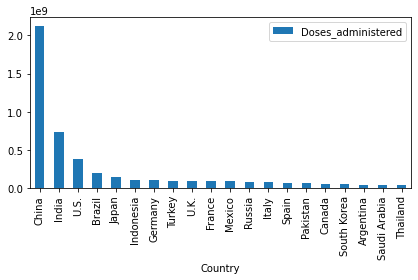

In [223]:
#top 20 selection
merge_selections.sort_values('Doses_administered', ascending = False).head(20).plot(kind='bar', x='Country',y='Doses_administered')
plt.tight_layout()
#plt.subplots_adjust(top=0.78)
plt.savefig('image1.jpeg')

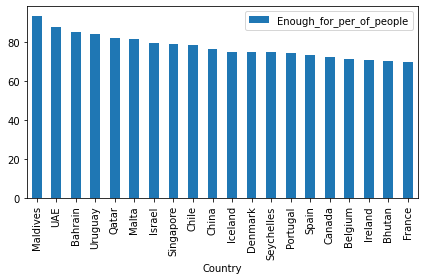

In [224]:
#top 20 selection
merge_selections.sort_values('Enough_for_per_of_people', ascending = False).head(20).plot(kind='bar', x='Country',y='Enough_for_per_of_people')
plt.tight_layout()
plt.savefig('image3.jpeg')

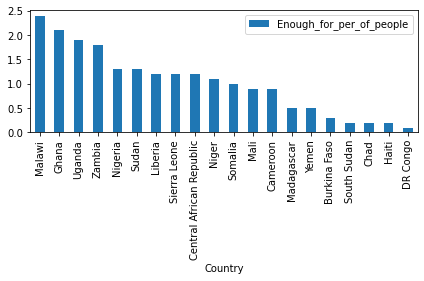

In [225]:
#bottom 20 selection
merge_selections.sort_values('Enough_for_per_of_people', ascending = False).tail(20).plot(kind='bar', x='Country',y='Enough_for_per_of_people')
plt.tight_layout()
plt.savefig('image4.jpeg')

<AxesSubplot:ylabel='Cumulative_deaths'>

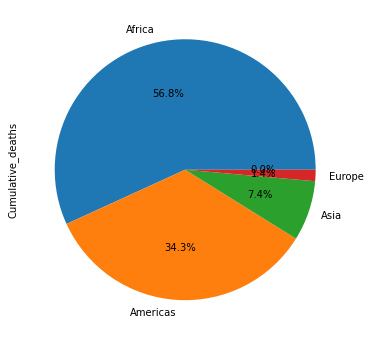

In [226]:
#continental pie chart 
plan = merge_selections.sort_values('Cumulative_deaths',ascending= False).tail(20)
plan.groupby('Region')['Cumulative_deaths'].sum().sort_values(ascending= False).plot.pie(y='Cumulative_deaths', figsize=(8,6),autopct="%1.1f%%")

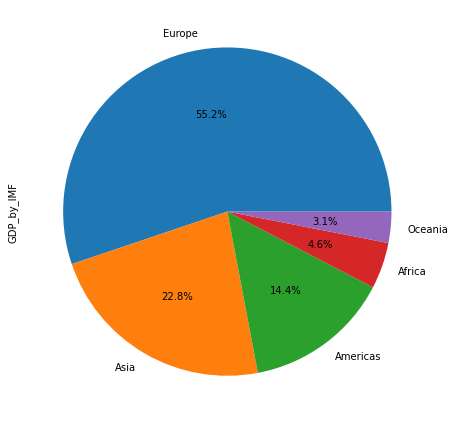

In [227]:
#continental pie chart 
merge_selections.groupby('Region')['GDP_by_IMF'].sum().sort_values(ascending= False).plot.pie( figsize=(8,6),autopct="%1.1f%%")
plt.tight_layout()
plt.savefig('image17.jpeg')

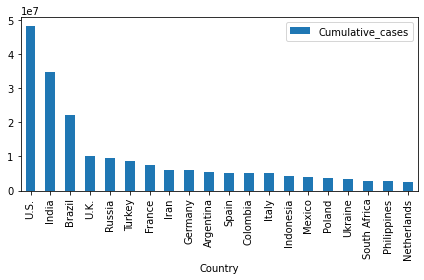

In [228]:
#top 20 selection
merge_selections.sort_values('Cumulative_cases', ascending = False).head(20).plot(kind='bar', x='Country',y='Cumulative_cases')
plt.tight_layout()
plt.savefig('image5.jpeg')

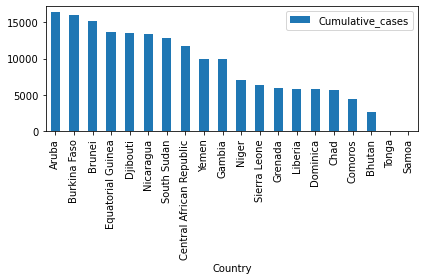

In [229]:
#bottom 20 selection
merge_selections.sort_values('Cumulative_cases', ascending = False).tail(20).plot(kind='bar', x='Country',y='Cumulative_cases')
plt.tight_layout()
plt.savefig('image6.jpeg')

<AxesSubplot:ylabel='Cumulative_cases'>

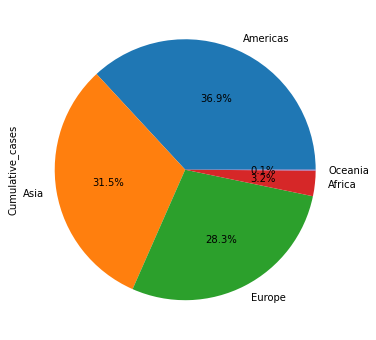

In [230]:
#continental pie chart 
merge_selections.groupby('Region')['Cumulative_cases'].sum().sort_values(ascending= False).plot.pie( figsize=(8,6),autopct="%1.1f%%")

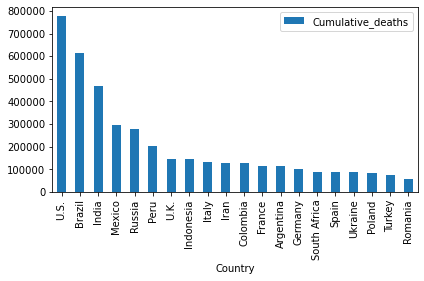

In [231]:
#top 20 selection
merge_selections.sort_values('Cumulative_deaths', ascending = False).head(20).plot(kind='bar', x='Country',y='Cumulative_deaths')
plt.tight_layout()
plt.savefig('image7.jpeg')

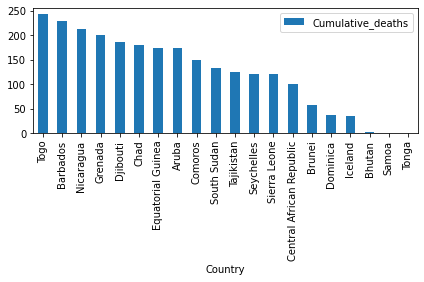

In [232]:
merge_selections.sort_values('Cumulative_deaths', ascending = False).tail(20).plot(kind='bar', x='Country',y='Cumulative_deaths')
plt.tight_layout()
plt.savefig('image8.jpeg')

<AxesSubplot:ylabel='Cumulative_deaths'>

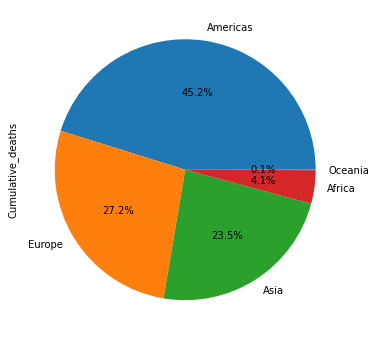

In [233]:
merge_selections.groupby('Region')['Cumulative_deaths'].sum().sort_values(ascending= False).plot.pie( figsize=(8,6),autopct="%1.1f%%")


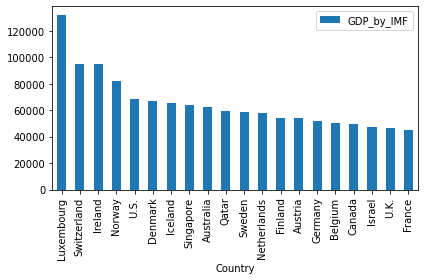

In [234]:
merge_selections.sort_values('GDP_by_IMF', ascending = False).head(20).plot(kind='bar', x='Country',y='GDP_by_IMF')
plt.tight_layout()
plt.savefig('image9.jpeg')

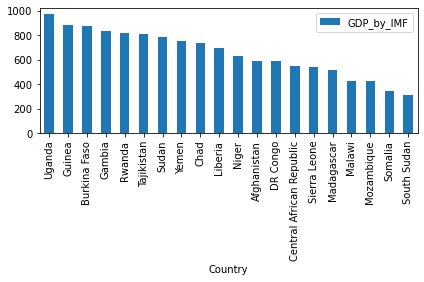

In [235]:
merge_selections.sort_values('GDP_by_IMF', ascending = False).tail(20).plot(kind='bar', x='Country',y='GDP_by_IMF')
plt.tight_layout()
plt.savefig('image10.jpeg')

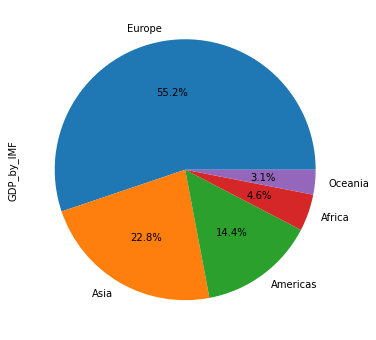

In [236]:
merge_selections.groupby('Region')['GDP_by_IMF'].sum().sort_values(ascending= False).plot.pie( figsize=(8,6),autopct="%1.1f%%")
plt.savefig('image11.jpeg')

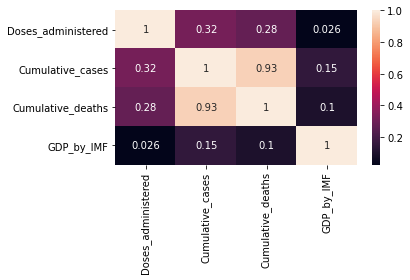

In [237]:
#correlation analysis
sel=merge_selections[['Doses_administered','Cumulative_cases','Cumulative_deaths','GDP_by_IMF']]
correlation_sel = sel.corr()
sns.heatmap(correlation_sel, annot=True)
plt.tight_layout()
plt.savefig('image18.jpeg')

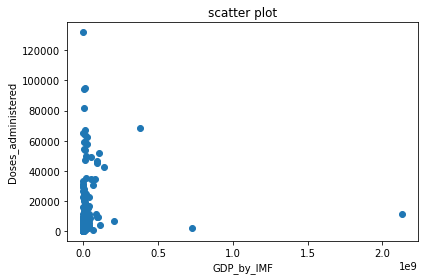

In [238]:
plt.scatter(x= merge_selections['Doses_administered'],y=merge_selections['GDP_by_IMF'])
plt.title('scatter plot')
plt.xlabel('GDP_by_IMF')
plt.ylabel('Doses_administered')
plt.tight_layout()
plt.savefig('image19.jpeg')

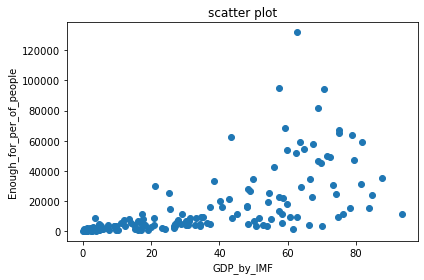

In [239]:
plt.scatter(x= merge_selections['Enough_for_per_of_people'],y=merge_selections['GDP_by_IMF'])
plt.title('scatter plot')
plt.xlabel('GDP_by_IMF')
plt.ylabel('Enough_for_per_of_people')
plt.tight_layout()
plt.savefig('image21.jpeg')

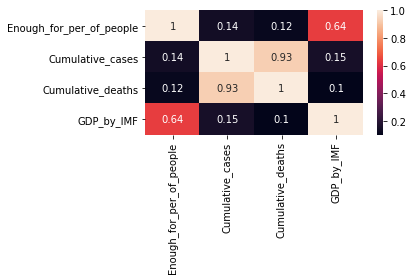

In [240]:
sel=merge_selections[['Enough_for_per_of_people','Cumulative_cases','Cumulative_deaths','GDP_by_IMF']]
correlation_sel = sel.corr()
sns.heatmap(correlation_sel, annot=True)
plt.tight_layout()
plt.savefig('image21.jpeg')

In [245]:
#multvarite regression 
sel=merge_selections[['Doses_administered','Cumulative_deaths','GDP_by_IMF']]
formula= 'Doses_administered ~ + GDP_by_IMF + Cumulative_deaths'
model1 = smf.ols(formula=formula, data=sel).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     Doses_administered   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     6.642
Date:                Tue, 04 Jan 2022   Prob (F-statistic):            0.00171
Time:                        18:17:41   Log-Likelihood:                -3242.0
No. Observations:                 159   AIC:                             6490.
Df Residuals:                     156   BIC:                             6499.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.817e+07   1.75e+0

In [242]:
#simple linear regression
sel=merge_selections[['Enough_for_per_of_people','GDP_by_IMF']]
formula= 'Enough_for_per_of_people ~  GDP_by_IMF'
result = smf.ols(formula=formula, data=sel).fit()
f = open('summary1.txt','w')
f.write(result.summary().as_text())
f.close()    
print(result.summary())

                               OLS Regression Results                               
Dep. Variable:     Enough_for_per_of_people   R-squared:                       0.404
Model:                                  OLS   Adj. R-squared:                  0.400
Method:                       Least Squares   F-statistic:                     106.3
Date:                      Tue, 04 Jan 2022   Prob (F-statistic):           2.33e-19
Time:                              18:16:24   Log-Likelihood:                -706.03
No. Observations:                       159   AIC:                             1416.
Df Residuals:                           157   BIC:                             1422.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [243]:
#polynomial regression
result_poly = smf.ols('Enough_for_per_of_people ~  GDP_by_IMF +' + 'I(GDP_by_IMF**2)', data=sel).fit()
print(result_poly.summary())
pred_poly = result_poly.predict(merge_selections.GDP_by_IMF)
#plt.plot(merge_selections.Enough_for_per_of_people,merge_selections.GDP_by_IMF,'o' )
#plt.plot(merge_selections.Enough_for_per_of_people.unique(), pred_poly.unique(),'o-')
f = open('summary3.txt','w')
f.write(result_poly.summary().as_text())
f.close()

                               OLS Regression Results                               
Dep. Variable:     Enough_for_per_of_people   R-squared:                       0.557
Model:                                  OLS   Adj. R-squared:                  0.552
Method:                       Least Squares   F-statistic:                     98.17
Date:                      Tue, 04 Jan 2022   Prob (F-statistic):           2.51e-28
Time:                              18:16:36   Log-Likelihood:                -682.37
No. Observations:                       159   AIC:                             1371.
Df Residuals:                           156   BIC:                             1380.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [244]:
#statistic summary of enough for percentage of population
merge_selections['Enough_for_per_of_people'].describe()


count    159.000000
mean      33.884277
std       26.661052
min        0.100000
25%        9.300000
50%       29.000000
75%       57.900000
max       93.400000
Name: Enough_for_per_of_people, dtype: float64